## Relatório do trabalho final da disciplina de estrutura de dados (2017/2)
##### Fernando Correa Gomes (00274317) e Daniel de Souza Novaes (00290193)


Esse relatório analisa o desempenho de um programa escrito em C escrito como trabalho final dessa disciplina.

A análise é iniciada partindo do arquivo de exemplo, quais são as diferenças de desempenho entre a implementação da splay e da abp para converter o arquivo TheGodfather-MarioPuzo-Chapter1-English.txt (78K) de ascii para morse?

In [16]:
read_csv()

,filename,tree,total_time,comparisons,converted_chars,tree_height
0,test-files/TheGodfather-MarioPuzo-Chapter1-Eng...,Splay,18,579913,64574,12
1,test-files/TheGodfather-MarioPuzo-Chapter1-Eng...,ABP,19,731299,64574,27


Podemos ver que entre a splay e a abp, o tempo total de processamento é bem próximo, mas o número de comparações realizadas na conversão é bem menor na splay, em comparação com a abp.

O número de comparações não deve mudar, mas devido ao método de cálculo de tempo de execução com a função clock do C, seria mais confiável se repetíssemos a execução do programa mais vezes com o mesmo arquivo e utilizássemos a média de tempo para comparação.

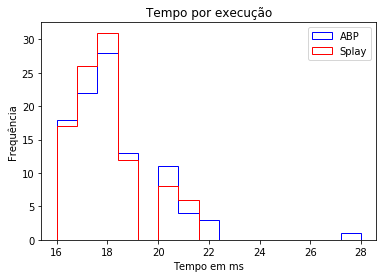

In [61]:
time_histogram(df)

A distribuição de tempo tende a ser bastante próxima entre as duas árvores, ao menos nesse arquivo. Com um número maior de caractéres a ser convertido, as diferenças de tempo devem ficar mais significativas, então vamos realizar o mesmo processo com um arquivo de 331K.

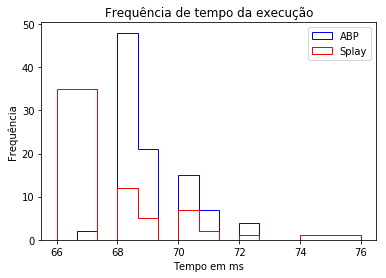

In [105]:
time_histogram(df_insect)

Nesse exemplo já é possível notar uma distribuição bem mais acentuada do tempo de execução diferente entre a ABP e a Splay. Então talvez com arquivos ainda maiores, a visualização da diferença de tempo seja maior.

Vamos realizar o mesmo teste com arquivos de 1,5M e 3,2M, respectivamente:

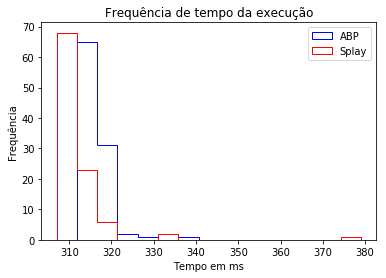

In [104]:
time_histogram(df_history)

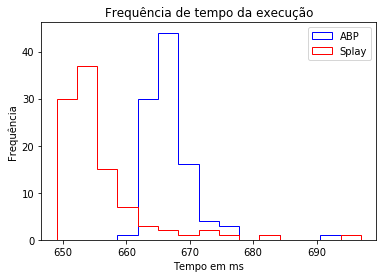

In [107]:
time_histogram(df_miserables)

A diferença se tornou bastante clara no último exemplo.

Vale ressaltar que todos os arquivos utilizados continham texto em inglês, nenhum foi gerado de maneira artificial. A geração de arquivos .txt com textos artificiais pode pender para um desempenho melhor de uma árvore em comparação com a outra. Abaixo são os histogramas de dois arquivos gerados artificialmente que favorecem um tipo específico de árvore.

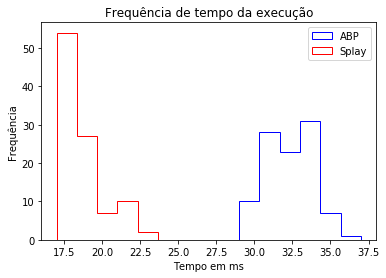

In [102]:
time_histogram(df_splay_biased)

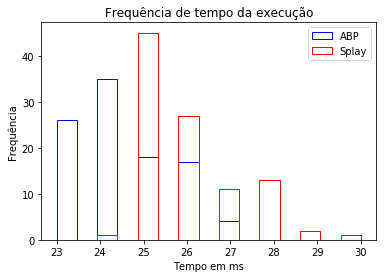

In [103]:
time_histogram(df_bst_biased)

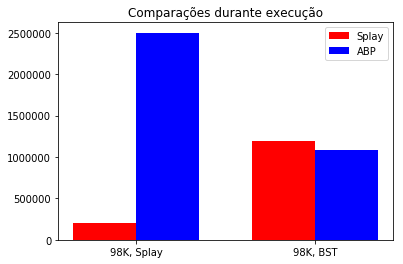

In [37]:
comparison_list = [df.at[800, "comparisons"], df.at[801, "comparisons"], df.at[1000, "comparisons"], df.at[1001, "comparisons"]]
file_sizes = ["98K, Splay", "98K, BST"]
comparison_bar(comparison_list, file_sizes)

Para finalizar, vamos demonstrar as diferenças gerais entre as duas implementações

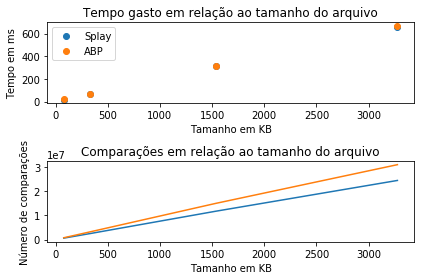

In [100]:
m_splay, m_bst, c_splay, c_bst = lists_of_values(df)
file_sizes = [78, 331, 1.5*1024, 3.2*1024]

f, (ax1, ax2) = plt.subplots(2)
ax1.plot(file_sizes, m_splay, 'o', label="Splay")
ax1.plot(file_sizes, m_bst, 'o', label="ABP")
ax1.set_title('Tempo gasto em relação ao tamanho do arquivo')
ax1.legend()
ax1.set_ylabel("Tempo em ms")
ax1.set_xlabel("Tamanho em KB")
ax2.set_title('Comparações em relação ao tamanho do arquivo')
ax2.plot(file_sizes, c_splay, label="Splay")
ax2.plot(file_sizes, c_bst, label="ABP")
ax2.set_ylabel("Número de comparações")
ax2.set_xlabel("Tamanho em KB")
plt.tight_layout()

In [14]:
! rm data.csv
! ./txtToMorse -t TabelaMorse.txt -i test-files/TheGodfather-MarioPuzo-Chapter1-English.txt -o saida.txt -s -c
! ./txtToMorse -t TabelaMorse.txt -i test-files/TheGodfather-MarioPuzo-Chapter1-English.txt -o saida.txt -c

In [19]:
! rm data.csv
for i in range(100):
    convert("test-files/TheGodfather-MarioPuzo-Chapter1-English.txt")
df = read_csv()

rm: cannot remove 'data.csv': No such file or directory


In [72]:
for i in range(100):
    convert("test-files/insect_adventures.txt")
df = read_csv()

In [87]:
for i in range(100):
    convert("test-files/history_modern_philosophy.txt")
df = read_csv()
df_history = df.iloc[400:600]

In [89]:
for i in range(100):
    convert("test-files/les_miserables.txt")
df = read_csv()
df_miserables = df.iloc[600:800]

In [93]:
create_splay_biased();

for i in range(100):
    convert("./splay_biased.txt")
df = read_csv()
df_splay_biased = df.iloc[800:1000]

In [35]:
create_bst_biased();

for i in range(100):
    convert("./bst_biased.txt")
df = read_csv()
df_bst_biased = df.iloc[1000:1200]

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def read_csv():
    df = pd.read_csv("data.csv", header=None,
                 names=["filename", "tree", "total_time", "comparisons", "converted_chars", "tree_height"])
    df["tree"] = df["tree"].replace(trees)
    return df


def convert(filename):
    ! ./txtToMorse -t TabelaMorse.txt -i {filename} -o saida.txt -s -c
    ! ./txtToMorse -t TabelaMorse.txt -i {filename} -o saida.txt -c
    

def time_histogram(dataframe):
    total_time = []
    total_time.append(dataframe[dataframe['tree']=="Splay"]['total_time'].tolist())
    total_time.append(dataframe[dataframe['tree']=="ABP"]['total_time'].tolist())
    colors = ['red', 'blue']
    labels = ['Splay', 'ABP']
    plt.hist(total_time, 15, histtype='step', color=colors, label=labels)
    plt.title('Frequência de tempo da execução')
    plt.xlabel("Tempo em ms")
    plt.ylabel("Frequência")
    plt.legend()
    plt.show()
    

def comparison_bar(values, file_size):
    N = len(values)//2
    labels = ['Splay', 'ABP']
    ind = np.arange(N)  # the x locations for the groups
    width = 0.35       # the width of the bars
    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, values[0::2], width, color='red')
    rects2 = ax.bar(ind + width, values[1::2], width, color='blue')
    # add some text for labels, title and axes ticks
    ax.set_title('Comparações durante execução')
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(file_size)
    ax.legend((rects1[0], rects2[0]), labels)
    plt.show()
    
trees = {0: "ABP",
         1: "Splay"}

In [49]:
import random

def create_splay_biased():
    with open("./splay_biased.txt", 'w') as file:
        for i in range(100000):
            file.write("Y")


def create_bst_biased():
    random.seed()
    char = "ABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890.,? '!/()&:;=-_\"$@"
    with open("./bst_biased.txt", 'w') as file:
        for i in range(100000):
            file.write(char[random.randint(0, len(char) - 1)])
            
def lists_of_values(dataframe):
    mean_splay = [0, 0, 0, 0]
    mean_bst = [0, 0, 0, 0]
    comparisons_splay = []
    comparisons_bst = []
    for i in range(800):
        if (i % 2) is 0:
            mean_splay[i//200] += dataframe["total_time"][i]
        else:
            mean_bst[i//200] += dataframe["total_time"][i]
    for i in range(4):
        mean_splay[i] = mean_splay[i] / 100
        comparisons_splay.append(dataframe["comparisons"][i * 200])
        mean_bst[i] = mean_bst[i] / 100
        comparisons_bst.append(dataframe["comparisons"][(i * 200) + 1])
    return mean_splay, mean_bst, comparisons_splay, comparisons_bst
    